<a href="https://colab.research.google.com/github/Rogerio-mack/Analise-de-Dados/blob/main/EDA_T10_SQL_Comandos_Basicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Gustavo Rocha">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

## <h1 align=left><font size = 6, style="color:rgb(200,0,0)">SQL Comandos Básicos</font></h1>
<hr>

# **Parte I** -  Definições básicas



## Definições:

* **Dado**: fato do mundo real que está registrado no computador

* **Informação**: fato útil que pode ser extraído diretamente ou indiretamente dos dados

* **Banco de Dados**: coleção de dados inter-relacionados e persistentes que representam um subconjunto dos fatos presentes em um domínio de aplicação

## O que é um banco de dados? E o tal do SQL?
Bancos de dados relacionais e linguagem de consulta estruturada (SQL):
* Um  **banco de dados** é uma coleção integrada de dados
* Um  sistema de gerenciamento de banco de dados **(SGBD)**  fornece mecanismos para armazenar e organizar dados
  * Permite acesso rápido e armazenamento de dados sem preocupação com a representação interna de bancos de dados
* **Sistemas relacionais de gerenciamento de banco de dados (RDBMSs)**  armazenam dados em  **tabelas** e definem relacionamentos entre as tabelas
* **Linguagem de Consulta Estruturada (SQL) — que pronunciamos em inglês como "see-quel" — é usada quase universalmente comsistemas de banco de dados relacionais** para manipular dados e realizar ** queries ou consultas** que solicitam informações que satisfazem determinados critérios
* RDBMSs populares e **open-source** incluem  **SQLite**,  **PostgreSQL**,  **MariaDB**  e  **MySQL**
  * Estes podem ser baixados e usados  **livremente** por qualquer pessoa
  * Todos têm suporte para Python
* Aqui utilizaremos  **SQLite**, que é  **empacotado com Python**
* RDBMSs proprietários populares incluem Microsoft SQL Server, Oracle, Sybase e IBM Db2




## SQL - Histórico
Em	junho	de	1970,	E.	F.	Codd,	membro	do
Laboratório de Pesquisa da IBM em San Jose, na
Califórnia, publicou um trabalho intitulado “ A Relacional Model of Data for Large Shared Data banks” (Um Modelo Relacional de dados para Grandes bancos de Dados Compartilhados), no jornal Association of Computer Machinery. Nesse trabalho, Codd estabeleceu princípios sobre gerência de banco de dados, denominando-os com o termo relacional. Essa foi a base utilizada na criação de uma linguagem-padrão para manipular informações em Banco de dados Relacionais. E essa linguagem é a SQL.




```
# Isto está formatado como código
```

### Tabelas , Linhas e Colunas 
* **Banco Relacional** &mdash; tabela lógica como representação para os dados
* `Employee` tabela que será utilizada para armazenar os dados de funcionários: 

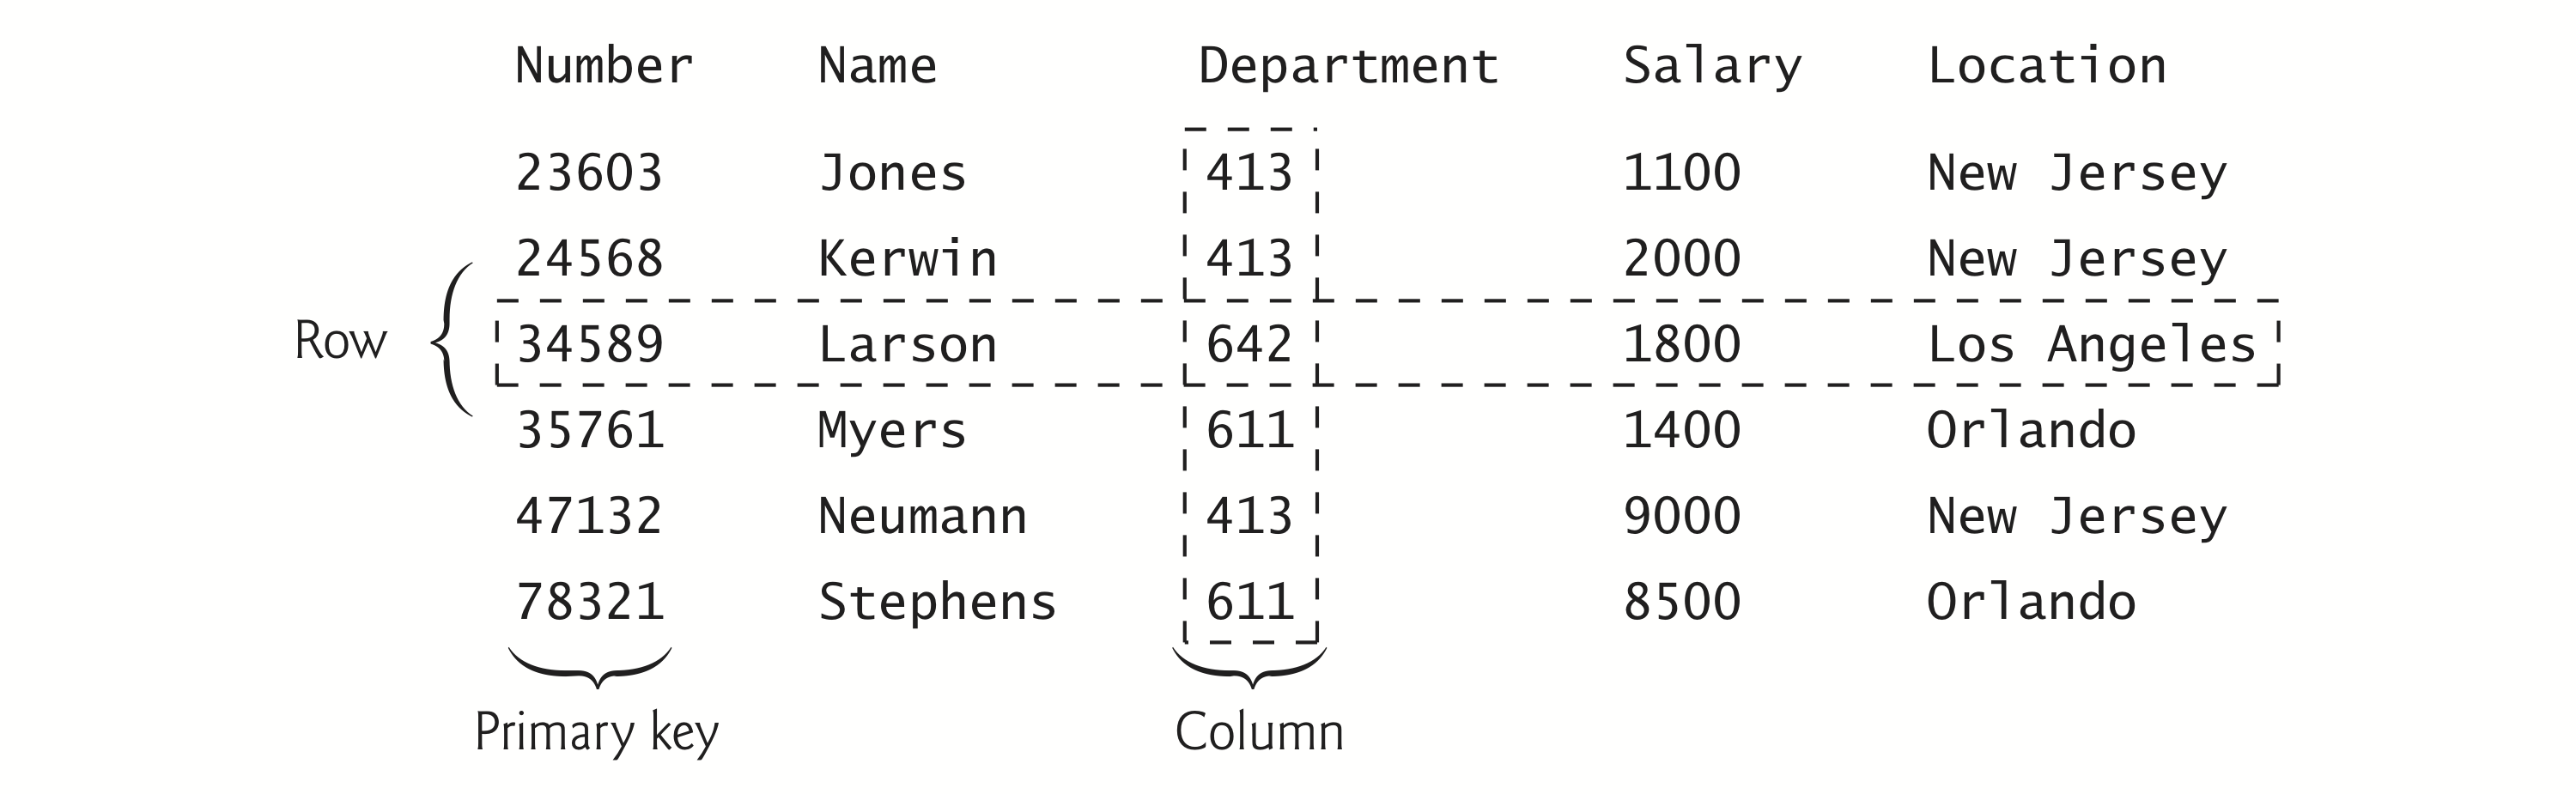

### Tabelas, Linhas e Colunas 
* **Linhas** cada uma descreve uma **única entidade**
    * Cada **linha** representa **um único funcionário**
* **Colunas** contém **valores individuais para os atributos**
* **Chave Primária**—uma coluna (ou grupo de colunas) com um determinado valor **único** para cada linha, de forma que cada **linha** possa ser **identificada** por sua **chave primária**
* **Exemplos de chaves primárias** 
    * CPF
    * números de ID do funcionário 
    * números de peças em um sistema de inventário


Isso já suficiente para você começar. Você ainda pode querer consultar a documentação do Jupyter ou do Colab para a criação de notebooks mais elaborados.

# **Parte II** - Lendo uma **base de dados** com o SQLite 

* A base de dados `chinook` contém informações sobre vários de nossos livros
* Vamos configurar o banco de dados no SQLite através da Biblioteca Padrão Python**`sqlite3` module**, usando um script fornecido 
*Veremos:
* Introdução às tabelas do banco de dados
* Usaremos esse banco de dados para introduzir conceitos de banco de dados, como operações que fazem **create**, **read**, **update** e **delete** dos dados
    * As chamadas operações **CRUD** 
*Usaremos SQL e pandas DataFrames para mostrar o conteúdo de cada tabela


### Carregando o banco de dados
* O seguinte comando **`sqlite3` abaixo ** carrega um banco de dados SQLite com extensão `.db` chamado `chinook.db`. Neste arquivo encontram-se todas as tabelas SQL, com os dados que iremos utilizar. Você pode baixar o arquivo neste [link](https://github.com/gustavogrds/eda_sqlite_python/blob/4610fb7872246601cfa44aee7663f0bffccd409b/chinook.db
) 



In [ ]:
import sqlite3

In [ ]:
!wget http://meusite.mackenzie.br/rogerio/data_load/chinook.db

--2021-05-05 23:21:57--  http://meusite.mackenzie.br/rogerio/data_load/chinook.db
Resolving meusite.mackenzie.br (meusite.mackenzie.br)... 168.197.92.228
Connecting to meusite.mackenzie.br (meusite.mackenzie.br)|168.197.92.228|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 884736 (864K)
Saving to: ‘chinook.db’

chinook.db          100%[===================>] 864.00K   438KB/s    in 2.0s    

2021-05-05 23:22:00 (438 KB/s) - ‘chinook.db’ saved [884736/884736]



### Sobre o banco de dados `Chinook`
Amostras de tabelas de banco de dados Chinook:
* Existem 11 tabelas no banco de dados de amostra chinook.

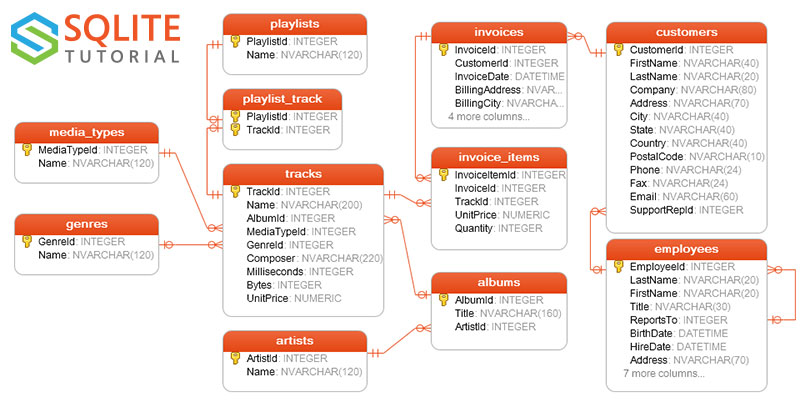

### **Tabelas** do banco
* `employees` A  tabela de funcionários armazena dados de funcionários, como id do funcionário, sobrenome, nome, etc. Ela também tem um campo denominado ReportsTo para especificar quem se reporta a quem.
* `customers` A tabela de clientes armazena dados de clientes.
* `invoices` & `invoice_items`: essas duas tabelas armazenam dados da fatura. A tabela de faturas armazena os dados do cabeçalho da fatura e a tabela invoice_items armazena os dados dos itens de linha da fatura.
* `artists` A tabela de artistas armazena dados de artistas. É uma tabela simples que contém apenas a id e o nome do artista.
* `albums` A tabela de álbuns armazena dados sobre uma lista de faixas. Cada álbum pertence a um artista. No entanto, um artista pode ter vários álbuns.
* `media_types` A tabela media_types armazena tipos de mídia, como arquivos de áudio MPEG e AAC.
* `genres` A tabela de gêneros armazena tipos de música, como rock, jazz, metal, etc.
* `tracks` A tabela de trilhas armazena os dados das canções. Cada faixa pertence a um álbum.
* `playlists` & `playlist_track`: tabela de playlists armazena dados sobre playlists. Cada lista de reprodução contém uma lista de faixas. Cada faixa pode pertencer a várias listas de reprodução. A relação entre a tabela de listas de reprodução e a tabela de faixas é de muitos para muitos. A tabela playlist_track é usada para refletir esse relacionamento.

# Parte III -  SQL `SELECT`
* As seções a seguir utilizam a mesma base de dados para apresentar o comando SQL no contexto da base `chinook`, demonstrando como fazer um comando `SELECT` que retorna dados selecionados de uma ou mais tabelas. 

| Cláusula SQL &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Descrição
| :---	| :---
| `SELECT` 	| Retorna dados de uma ou mais tabelas. 
| `FROM` 	| Especifica o nome das tabelas envolvidas nas queries. Obrigatório em todo `SELECT`. 
| `WHERE` 	| Critério utilizado para seleção de linhas a serem trazidas. Opcional para um comando `SELECT`.
| `GROUP BY` 	| Critério para agrupar linhas. Opcional para um comando `SELECT`.
| `ORDER BY` 	| Critério para ordenar linhas. Opcional em um comando `SELECT`.
| `INNER JOIN` 	| Une os dados de múltiplas tabelas.

In [ ]:
import pandas as pd

import sqlite3
connection = sqlite3.connect('/content/chinook.db')

In [ ]:
# comando SELECT lê a tabela customers, usando a connection e coloca o id 
# da tabela como índice do dataframe
query = ('select * from customers LIMIT 10')
df = pd.read_sql(query, connection)

# comando SELECT lê a tabela customers, usando a connection e coloca o id 
# da tabela como índice do dataframe (descomente caso prefira usar)
#df = pd.read_sql(query, connection, index_col='CustomerId')
df

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


### Selecionando apenas algumas colunas

In [ ]:
query = ("""select CustomerId,	FirstName, LastName,	City,	State 
            from customers
            LIMIT 10""")
df = pd.read_sql(query, connection)
df

,CustomerId,FirstName,LastName,City,State
0,1,Luís,Gonçalves,São José dos Campos,SP
1,2,Leonie,Köhler,Stuttgart,None
2,3,François,Tremblay,Montréal,QC
3,4,Bjørn,Hansen,Oslo,None
4,5,František,Wichterlová,Prague,None
5,6,Helena,Holý,Prague,None
6,7,Astrid,Gruber,Vienne,None
7,8,Daan,Peeters,Brussels,None
8,9,Kara,Nielsen,Copenhagen,None
9,10,Eduardo,Martins,São Paulo,SP


### Exemplo da Tabela `customers`:

* A base de dados possui diversas tabelas mas nos exemplos acima estamos focando na tabela customers. Em outros exemplos abaixo iremos explorar outras tabelas.
* Esta tabela `customers` possui diversas colunas que podem ser trazidas usando o `*`, porém, é uma boa prática trazer apenas as colunas desejadas, separando-as por vírgulas.
* Note que a coluna **CustomerID** é uma chave identificadora do cliente na base, mais especificamente uma chave auto-incremental denominada em SQL de: **chave primária**

### Filtrando ocorrências com o `WHERE`
* Frequentemente selecionamos linhas que satisfaçam certos **critérios de seleção** (**predicados**), especialmente em big data, onde um banco de dados pode conter milhões ou bilhões de linhas
* Use o `AND` para adicionar critérios

In [ ]:
query = ("""select CustomerId,	FirstName, LastName,	City,	State 
            from customers
            WHERE Country = 'Brazil'
            LIMIT 10 """)
df = pd.read_sql(query, connection)
df

,CustomerId,FirstName,LastName,City,State
0,1,Luís,Gonçalves,São José dos Campos,SP
1,10,Eduardo,Martins,São Paulo,SP
2,11,Alexandre,Rocha,São Paulo,SP
3,12,Roberto,Almeida,Rio de Janeiro,RJ
4,13,Fernanda,Ramos,Brasília,DF


In [ ]:
query = ("""select CustomerId,	FirstName, LastName,	City,	State 
            from customers
            WHERE Country = 'Brazil'
            AND STATE = 'SP'
            LIMIT 10 """)
df = pd.read_sql(query, connection)
df.head()

,CustomerId,FirstName,LastName,City,State
0,1,Luís,Gonçalves,São José dos Campos,SP
1,10,Eduardo,Martins,São Paulo,SP
2,11,Alexandre,Rocha,São Paulo,SP


#### Correspondência de padrões
* Operadores de cláusula `WHERE`:`<`,`> `,`<=`,`> =`,`=`,`<>`(diferente) e `LIKE`
* **`LIKE`** é usado para **correspondência de padrões**
* **porcentagem (%)** é um caractere curinga que faz correspondência com **zero ou mais** caracteres (ver exemplos).
* `IN` permite procurar em uma lista de valores

In [ ]:
query = ("""SELECT
	name,
	milliseconds,
	bytes,
	albumid
FROM
	tracks
WHERE
	albumid = 1
AND milliseconds > 250000 """)
df = pd.read_sql(query, connection)
df.head()

,Name,Milliseconds,Bytes,AlbumId
0,For Those About To Rock (We Salute You),343719,11170334,1
1,Evil Walks,263497,8611245,1
2,Breaking The Rules,263288,8596840,1
3,Spellbound,270863,8817038,1


In [ ]:
query = ("""
SELECT
	name,
	albumid,
	composer
FROM
	tracks
WHERE
	composer LIKE '%Smith%'
ORDER BY
	albumid """)
df = pd.read_sql(query, connection)
df.head()

,Name,AlbumId,Composer
0,Restless and Wild,3,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D..."
1,Princess of the Dawn,3,Deaffy & R.A. Smith-Diesel
2,Killing Floor,19,Adrian Smith
3,Machine Men,19,Adrian Smith
4,2 Minutes To Midnight,95,Adrian Smith/Bruce Dickinson


In [ ]:
query = ("""
SELECT
	name,
	albumid,
	mediatypeid
FROM
	tracks
WHERE
	mediatypeid IN (2, 3) """)
df = pd.read_sql(query, connection)
df.head()

,Name,AlbumId,MediaTypeId
0,Balls to the Wall,2,2
1,Fast As a Shark,3,2
2,Restless and Wild,3,2
3,Princess of the Dawn,3,2
4,Welcome to the Jungle,90,2


### ORDER BY
* O SQL armazena dados nas tabelas em uma ordem não especificada. Isso significa que as linhas da tabela podem ou não estar na ordem em que foram inseridas.

* Se você usar a instrução SELECT para consultar dados de uma tabela, a ordem das linhas no conjunto de resultados não será especificada.

In [ ]:
#sem order by
query = ("""
SELECT
	name,
	milliseconds, 
        albumid
FROM
	tracks """)
df = pd.read_sql(query, connection)
df.head()

,Name,Milliseconds,AlbumId
0,For Those About To Rock (We Salute You),343719,1
1,Balls to the Wall,342562,2
2,Fast As a Shark,230619,3
3,Restless and Wild,252051,3
4,Princess of the Dawn,375418,3


In [ ]:
#com order by
query = ("""
SELECT
	name,
	milliseconds, 
	albumid
FROM
	tracks
ORDER BY
	albumid ASC""")
df = pd.read_sql(query, connection)
df.head()

,Name,Milliseconds,AlbumId
0,For Those About To Rock (We Salute You),343719,1
1,Put The Finger On You,205662,1
2,Let's Get It Up,233926,1
3,Inject The Venom,210834,1
4,Snowballed,203102,1


Suponha que você queira classificar o resultado classificado (por AlbumId) acima pela coluna Milissegundos em ordem decrescente. Nesse caso, você precisa adicionar a coluna Milissegundos à cláusula ORDER BY da seguinte maneira:

In [ ]:
query = ("""
SELECT
	name,
	milliseconds, 
	albumid
FROM
	tracks
ORDER BY
	albumid ASC,
        milliseconds DESC
LIMIT 10""")
df = pd.read_sql(query, connection)
df

,Name,Milliseconds,AlbumId
0,For Those About To Rock (We Salute You),343719,1
1,Spellbound,270863,1
2,Evil Walks,263497,1
3,Breaking The Rules,263288,1
4,Let's Get It Up,233926,1
5,Inject The Venom,210834,1
6,Night Of The Long Knives,205688,1
7,Put The Finger On You,205662,1
8,Snowballed,203102,1
9,C.O.D.,199836,1


#### Ordenando com valores NULL
No mundo do banco de dados, NULL é especial. Isso denota que as informações faltam ou os dados não são aplicáveis.

Suponha que você queira armazenar o aniversário de um artista em uma tabela. No momento de salvar o registro do artista, você não tem as informações de aniversário.

Para representar as informações de aniversário desconhecidas no banco de dados, você pode usar uma data especial como 01.01.1900 ou uma string vazia ''. No entanto, ambos os valores não mostram claramente que o aniversário é desconhecido.

NULL foi inventado para resolver esse problema. Em vez de usar um valor especial para indicar que as informações estão faltando, o NULL é usado.

NULL também é especial porque você não pode compará-lo com outro valor. Simplificando, se as duas informações são desconhecidas, você não pode compará-las.

NULL não pode ser comparado com ele mesmo; NULL não é igual a si mesmo, então NULL = NULL sempre resulta em falso.

Quando se trata de classificação, o SQLite considera o NULL menor do que qualquer outro valor.

Isso significa que NULLs aparecerão no início do conjunto de resultados se você usar ASC ou no final do conjunto de resultados quando usar DESC.

In [ ]:
query = ("""
SELECT 
    TrackId, 
    Name, 
    Composer 
FROM 
   tracks
ORDER BY 
   Composer
   LIMIT 10""")
df = pd.read_sql(query, connection)
df

,TrackId,Name,Composer
0,2,Balls to the Wall,None
1,63,Desafinado,None
2,64,Garota De Ipanema,None
3,65,Samba De Uma Nota Só (One Note Samba),None
4,66,Por Causa De Você,None
5,67,Ligia,None
6,68,Fotografia,None
7,69,Dindi (Dindi),None
8,70,Se Todos Fossem Iguais A Você (Instrumental),None
9,71,Falando De Amor,None


### DISTINCT
* A cláusula `DISTINCT` é uma cláusula opcional da instrução `SELECT`. A cláusula `DISTINCT` permite remover as linhas duplicadas no conjunto de resultados.

In [ ]:
# sem distinct
query = ("""
SELECT city
FROM customers
ORDER BY city
LIMIT 10""")
df = pd.read_sql(query, connection)
df

,City
0,Amsterdam
1,Bangalore
2,Berlin
3,Berlin
4,Bordeaux
5,Boston
6,Brasília
7,Brussels
8,Budapest
9,Buenos Aires


In [ ]:
# com o Distinct
query = ("""
SELECT  DISTINCT
	city,
	country
FROM
	customers
ORDER BY
	country
LIMIT 10""")
df = pd.read_sql(query, connection)
df

,City,Country
0,Buenos Aires,Argentina
1,Sidney,Australia
2,Vienne,Austria
3,Brussels,Belgium
4,São José dos Campos,Brazil
5,São Paulo,Brazil
6,Rio de Janeiro,Brazil
7,Brasília,Brazil
8,Montréal,Canada
9,Edmonton,Canada


In [ ]:
query = ("""
SELECT DISTINCT company
FROM customers
LIMIT 10""")
df = pd.read_sql(query, connection)
df

,Company
0,Embraer - Empresa Brasileira de Aeronáutica S.A.
1,None
2,JetBrains s.r.o.
3,Woodstock Discos
4,Banco do Brasil S.A.
5,Riotur
6,Telus
7,Rogers Canada
8,Google Inc.
9,Microsoft Corporation


### COUNT
* Conta o número de ítem em um determinado retorno

In [ ]:
#exemplo: conte o número de faixas na tabela `tracks`
query = ("""
SELECT COUNT(*) 
FROM tracks""")
df = pd.read_sql(query, connection)
df

,COUNT(*)
0,3503


### BETWEEN
* O `BETWEEN` serve para selecionarmos intervalos entre um valor e outro, seja numérico ou entre datas.
* Veja os exemplos abaixo:


In [ ]:
query = ("""
SELECT
    InvoiceId,
    BillingAddress,
    Total
FROM
    invoices
WHERE
    Total BETWEEN 14.91 and 18.86    
ORDER BY
    Total""")
df = pd.read_sql(query, connection)
df

,InvoiceId,BillingAddress,Total
0,193,Berger Straße 10,14.91
1,103,162 E Superior Street,15.86
2,208,Ullevålsveien 14,15.86
3,306,Klanova 9/506,16.86
4,313,"68, Rue Jouvence",16.86
5,88,"Calle Lira, 198",17.91
6,89,"Rotenturmstraße 4, 1010 Innere Stadt",18.86
7,201,319 N. Frances Street,18.86


In [ ]:
#Selecionar valores entre duas datas
query = ("""
SELECT
    InvoiceId,
    BillingAddress,
    InvoiceDate,
    Total
FROM
    invoices
WHERE
    InvoiceDate BETWEEN '2010-01-01' AND '2010-01-31'
ORDER BY
    InvoiceDate""")
df = pd.read_sql(query, connection)
df

,InvoiceId,BillingAddress,InvoiceDate,Total
0,84,"68, Rue Jouvence",2010-01-08 00:00:00,1.98
1,85,Erzsébet krt. 58.,2010-01-08 00:00:00,1.98
2,86,"Via Degli Scipioni, 43",2010-01-09 00:00:00,3.96
3,87,Celsiusg. 9,2010-01-10 00:00:00,6.94
4,88,"Calle Lira, 198",2010-01-13 00:00:00,17.91
5,89,"Rotenturmstraße 4, 1010 Innere Stadt",2010-01-18 00:00:00,18.86
6,90,801 W 4th Street,2010-01-26 00:00:00,0.99


# Parte IV - SQL JOINs

`JOINS` são uma parte importante da linguagem SQL. Vamos ver neste curso o INNER (ou apenas JOIN) e o LEFT.

### Inner Join
* `INNER JOIN` é um conjunto de registros que correspondem em ambas as tabelas. Se quiser encontrar uma linha de dados que apareça em duas tabelas separadas, use INNER JOIN. 

* O `INNER JOIN` não alterará as duas tabelas que você está consultando, mas criará um novo conjunto de dados baseado em suas comparações booleanas básicas: igual a (=), diferente de (! =), Maior que (>), maior que ou igual a (> =), menor que (<) ou menor que igual a (> =).

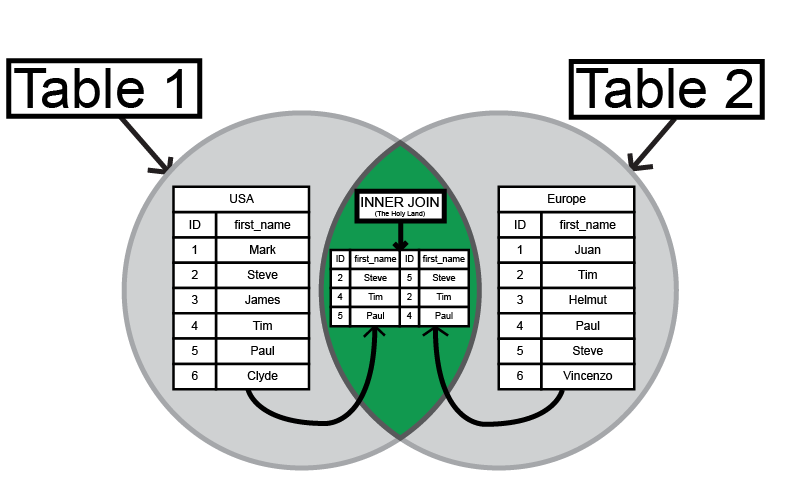

### No nosso exemplo:


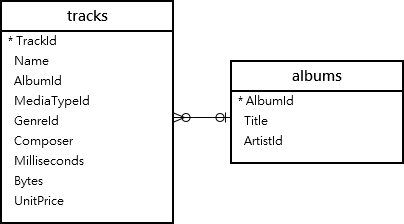

In [ ]:
query = ("""
SELECT
	trackid,
	name,
	title
FROM
	tracks
INNER JOIN albums ON albums.albumid = tracks.albumid
LIMIT 10""")
df = pd.read_sql(query, connection)
df

,TrackId,Name,Title
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
1,6,Put The Finger On You,For Those About To Rock We Salute You
2,7,Let's Get It Up,For Those About To Rock We Salute You
3,8,Inject The Venom,For Those About To Rock We Salute You
4,9,Snowballed,For Those About To Rock We Salute You
5,10,Evil Walks,For Those About To Rock We Salute You
6,11,C.O.D.,For Those About To Rock We Salute You
7,12,Breaking The Rules,For Those About To Rock We Salute You
8,13,Night Of The Long Knives,For Those About To Rock We Salute You
9,14,Spellbound,For Those About To Rock We Salute You


Para cada linha na tabela `tracks`, o SQLite usa o valor na coluna albumid da tabela `tracks` para comparar com o valor na albumid da tabela `albums`. Se o SQLite encontrar uma correspondência, ele combina dados de linhas em ambas as tabelas no conjunto de resultados.

Você pode incluir as colunas AlbumId de ambas as tabelas no conjunto de resultados final para ver o efeito.

In [ ]:
query = ("""
SELECT
    trackid,
    name,
    tracks.albumid AS album_id_tracks,
    albums.albumid AS album_id_albums,
    title
FROM
    tracks
    INNER JOIN albums ON albums.albumid = tracks.albumid""")
df = pd.read_sql(query, connection)
df.head()

,TrackId,Name,album_id_tracks,album_id_albums,Title
0,1,For Those About To Rock (We Salute You),1,1,For Those About To Rock We Salute You
1,6,Put The Finger On You,1,1,For Those About To Rock We Salute You
2,7,Let's Get It Up,1,1,For Those About To Rock We Salute You
3,8,Inject The Venom,1,1,For Those About To Rock We Salute You
4,9,Snowballed,1,1,For Those About To Rock We Salute You


Podemos dar apelidos para as tabelas para não precisar escrever todo o nome na tabela no ON do JOIN:

In [ ]:
query = ("""
SELECT
	trackid,
	name,
	title
FROM
	tracks t
INNER JOIN albums a ON a.albumid = t.albumid
LIMIT 10""")
df = pd.read_sql(query, connection)
df

,TrackId,Name,Title
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
1,6,Put The Finger On You,For Those About To Rock We Salute You
2,7,Let's Get It Up,For Those About To Rock We Salute You
3,8,Inject The Venom,For Those About To Rock We Salute You
4,9,Snowballed,For Those About To Rock We Salute You
5,10,Evil Walks,For Those About To Rock We Salute You
6,11,C.O.D.,For Those About To Rock We Salute You
7,12,Breaking The Rules,For Those About To Rock We Salute You
8,13,Night Of The Long Knives,For Those About To Rock We Salute You
9,14,Spellbound,For Those About To Rock We Salute You


### Inner JOIN com 3 tabelas

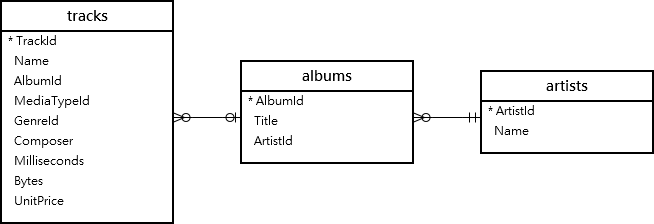

In [ ]:
query = ("""
SELECT
    trackid,
    tracks.name AS track,
    albums.title AS album,
    artists.name AS artist
FROM
    tracks
    INNER JOIN albums ON albums.albumid = tracks.albumid
    INNER JOIN artists ON artists.artistid = albums.artistid
LIMIT 10""")
df = pd.read_sql(query, connection)
df

,TrackId,track,album,artist
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,AC/DC
1,6,Put The Finger On You,For Those About To Rock We Salute You,AC/DC
2,7,Let's Get It Up,For Those About To Rock We Salute You,AC/DC
3,8,Inject The Venom,For Those About To Rock We Salute You,AC/DC
4,9,Snowballed,For Those About To Rock We Salute You,AC/DC
5,10,Evil Walks,For Those About To Rock We Salute You,AC/DC
6,11,C.O.D.,For Those About To Rock We Salute You,AC/DC
7,12,Breaking The Rules,For Those About To Rock We Salute You,AC/DC
8,13,Night Of The Long Knives,For Those About To Rock We Salute You,AC/DC
9,14,Spellbound,For Those About To Rock We Salute You,AC/DC


# Referências:
* [Artigo do Level-UP](https://levelup.gitconnected.com/sql-joins-2cc89babb6f9): referência para algumas das figuras
* [Página do SQL Tutorial](https://www.sqlitetutorial.net/): referência para a a maioria dos exemplos deste material
* [Github da Chinook db](https://github.com/lerocha/chinook-database): link para o código fonte que gera a base.

# Exercícios:

## Questão 1
* Forneça uma consulta mostrando os clientes (apenas seus nomes completos, ID do cliente e país) que não estão nos EUA.

In [ ]:
#solução:


## Questão 2
* Forneça uma consulta mostrando apenas os clientes do Brasil. Ordene (usando ORDER BY) por cidade.

In [ ]:
#solução:


## Questão 3
* Fornece uma query mostrando uma lista exclusiva (use o distinct) de países de faturamento da tabela `invoice`. Selecione os países de cobrança distintos da fatura.

In [ ]:
#solução


## Questão 4
* Quantas faturas havia entre 2009 e 2011? Use a tabela `invoices`.

In [ ]:
#solução


## Questão 5
* Faça um inner join entre as tabelas `tracks` e `genres` que retorne o nome (tracks.name) da música, do(a) compositor(a) (tracks.composer) e o gênero (genres) da música. Use como chave o genreid. Use o order by tracks.name para ordenar.Limite a 10 valores. 

In [ ]:
#solução

# Próxima Semana 
* Continuaremos com os JOINS  
* Falaremos sobre o GROUP BY 
* Outras operações CRUD